# Exploration of Flights in the United States data
## by Stanislav Chistyakov

## Preliminary Wrangling

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for the delays and cancellations, from 1987 to 2008.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
flights = pd.read_csv('flights_data.csv')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [4]:
carriers = pd.read_csv('carriers.csv')
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


In [5]:
airports = pd.read_csv('airports.csv')
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


In [6]:
df = flights.sample(1000000)

### Structure of the dataset

There are 7 009 727 rows (records) and 29 columns (features) in the original dataset, however to speed up the data visualisation process, I randomly sampled 1 000 000 rows. Most features are discrete and categorical. I downloaded three additional datasets (Carrier data and Airport data) to support the original dataframe with some extra information.

## Univariate Exploration

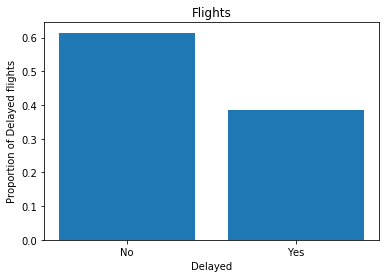

In [338]:
values = []
values.append(1-(df['Year'][df['DepDelay']>0].count()/df['Year'].count()))
values.append(df['Year'][df['DepDelay']>0].count()/df['Year'].count())
plt.bar([0,1],values)
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Proportion of Delayed flights')
plt.xlabel('Delayed')
plt.title('Flights')
plt.show()

<b>Around 40% of flights were delayed.</b>

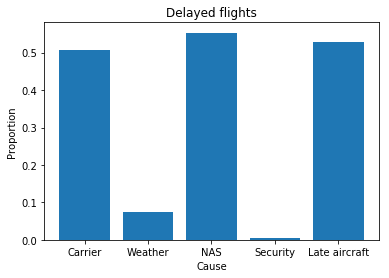

In [349]:
df_delay = df[df['DepDelay']>0].copy()
df_delay = df_delay[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
df_delay = df_delay.dropna()
values = []
values.append(df_delay[df_delay['CarrierDelay']!=0.0].count()[0]/df_delay.count()[0])
values.append(df_delay[df_delay['WeatherDelay']!=0.0].count()[0]/df_delay.count()[0])
values.append(df_delay[df_delay['NASDelay']!=0.0].count()[0]/df_delay.count()[0])
values.append(df_delay[df_delay['SecurityDelay']!=0.0].count()[0]/df_delay.count()[0])
values.append(df_delay[df_delay['LateAircraftDelay']!=0.0].count()[0]/df_delay.count()[0])
labels = ['Carrier','Weather','NAS','Security','Late aircraft']
plt.bar([0,1,2,3,4],values)
plt.xticks([0,1,2,3,4],labels)
plt.ylabel('Proportion')
plt.xlabel('Cause')
plt.title('Delayed flights')
plt.show()

<b>The plot above shows the major reasons for a departing flight delay. The proportions do not add up to 1, because there were cases with multiple causes of delays.</b>

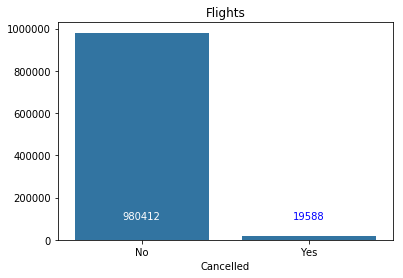

In [221]:
base_color = sb.color_palette()[0]
sb.countplot(data=df,x='Cancelled',color=base_color)
plt.ylabel('')
plt.xticks(np.arange(2), ('No','Yes'))
plt.title('Flights')
canc_counts = df['Cancelled'].value_counts().values.tolist()
plt.text(0,100000,str(canc_counts[0]),ha='center',color='w')
plt.text(1,100000,str(canc_counts[1]),ha='center',color='b')
plt.show()

<b> First of all, I have found out that out of 1 000 000 flights, only around 20 000 (2%) were cancelled. </b>

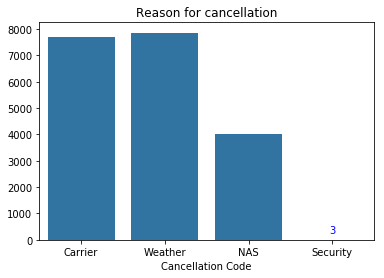

In [222]:
sb.countplot(data=df,x='CancellationCode',color=base_color)
plt.xticks(np.arange(4),('Carrier','Weather','NAS','Security'))
plt.ylabel('')
plt.xlabel('Cancellation Code')
plt.title('Reason for cancellation')
canc_counts = df['CancellationCode'].value_counts().values.tolist()
plt.text(3,250,str(canc_counts[3]),ha='center',color='b')
plt.show()

<b>Then, I looked at the major reasons for cancellations and found out that the vast majority of them happened because of the carriers or weather.</b>

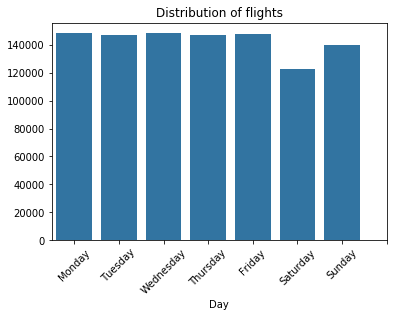

In [237]:
sb.countplot(data=df,x='DayOfWeek',color=base_color)
plt.title('Distribution of flights')
plt.xlabel('Day')
plt.ylabel('')
ticks = np.arange(0,8,1)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, days, rotation=45) 
plt.show()

<b>The above plot shows that flights are evenly spread out throughout the week, however there is a slight decline in the number on Saturdays.</b>

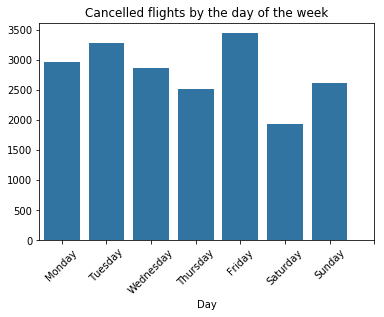

In [239]:
df_canc = df[df['Cancelled']==1] #I created a dataframe for the flights that were cancelled.
base_color = sb.color_palette()[0]
sb.countplot(data=df_canc,x='DayOfWeek',color=base_color)
plt.ylabel('')
plt.xlabel('Day')
plt.title('Cancelled flights by the day of the week')
ticks = np.arange(0,8,1)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, days, rotation=45) 
plt.show()

<b>I looked at the distribution of cancelled flights by the day of the week. The distribution does not show any significant differences between the days, apart from Saturdays having less cancelled flights than other days.</b>

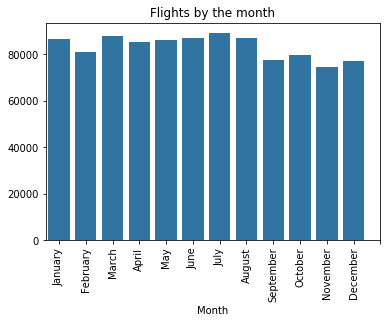

In [240]:
base_color = sb.color_palette()[0]
sb.countplot(data=df,x='Month',color=base_color)
plt.ylabel('')
plt.title('Flights by the month')
ticks = np.arange(0,13,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks, months, rotation=90) 
plt.show()

<b>The distribution above shows that flights are evenly spread out through the year.</b>

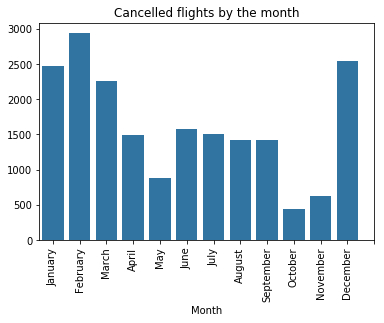

In [241]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_canc,x='Month',color=base_color)
plt.ylabel('')
plt.title('Cancelled flights by the month')
ticks = np.arange(0,13,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks, months, rotation=90) 
plt.show()

<b>The highest number of flight cancellations happened in the winter months, which makes sense because of sometimes severe weather conditions.</b>

In [242]:
bin_names = ['Winter','Spring','Summer','Autumn']
bin_edges = [0,2,5,8,11]
df_canc_1 = df_canc.copy()
df_canc_1['Season'] = pd.cut(df_canc_1['Month'],bin_edges,labels=bin_names) #I created a new column, Season, to complete 
#further analysis

In [243]:
df_canc_1['Season'] = df_canc_1['Season'].fillna('Winter')

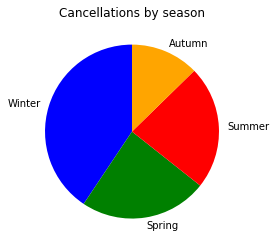

In [227]:
relative_counts = df_canc_1['Season'].value_counts()/df_canc_1['Season'].value_counts().sum()

plt.title('Cancellations by season')
plt.pie(relative_counts,labels=relative_counts.index,startangle=90,colors=['blue','green','red','orange'])
plt.show()

<b>The pie chart above shows that the most cancellations happened in winter.</b>

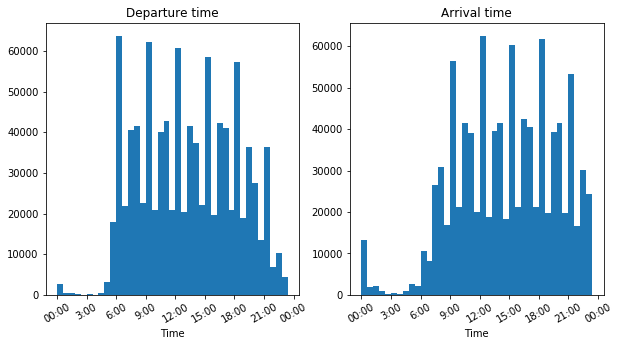

In [278]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
ticks = (0,300,600,900,1200,1500,1800,2100,2400)
labels = ['00:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','00:00']
bins_edges = np.arange(0,2400,60)
plt.hist(data=df,x='DepTime',bins=bins_edges)
plt.title('Departure time')
plt.xlabel('Time')
plt.xticks(ticks,labels,rotation=30)

plt.subplot(1,2,2)
bins_edges = np.arange(0,2400,60)
plt.hist(data=df,x='ArrTime',bins=bins_edges)
plt.title('Arrival time')
plt.xlabel('Time')
plt.xticks(ticks,labels,rotation=30)
plt.show()

<b>The above distributions show that the majority of flights depart from 6 am to 6 pm and arrive between 8 am and 10 pm.</b>

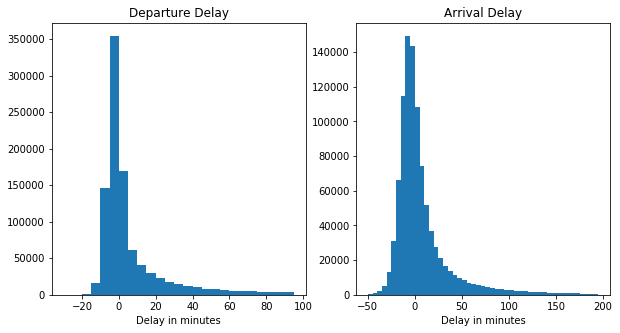

In [279]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
bins_edges = np.arange(-30,100,5)
plt.hist(data=df,x='DepDelay',bins=bins_edges)
plt.title('Departure Delay')
plt.xlabel('Delay in minutes')

plt.subplot(1,2,2)
bins_edges = np.arange(-50,200,5)
plt.hist(data=df,x='ArrDelay',bins=bins_edges)
plt.title('Arrival Delay')
plt.xlabel('Delay in minutes')
plt.show()

<b>I also compared the delays in minutes of arrivals and departures. From the plots above it becomes obvious that the arrival delays are usually more significant than the departure delays.</b>

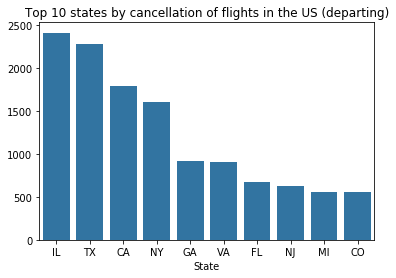

In [299]:
canc_air = df_canc[['Origin']].copy() #I created a copy of the dataframe that has all cancelled flights.
canc_air = canc_air.rename(columns={'Origin':'iata'})
canc_air_full = canc_air.merge(airports,on='iata')

sb.countplot(data=canc_air_full,x='state',order=canc_air_full.state.value_counts().iloc[:10].index,color=base_color)
plt.title('Top 10 states by cancellation of flights in the US (departing)')
plt.ylabel('')
plt.xlabel('State')
plt.show()

<b>From the plot above we can state that Illinois, Texas and California have the highest absolute number of departing flights cancelled.</b>

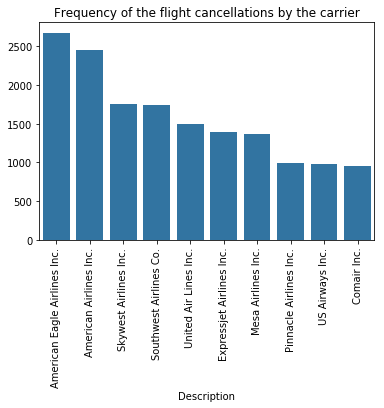

In [297]:
canc_carr = df_canc[['UniqueCarrier']]
canc_carr = canc_carr.rename(columns={'UniqueCarrier':'Code'})
canc_carr_full = canc_carr.merge(carriers,on='Code')
sb.countplot(data=canc_carr_full,x='Description',order=canc_carr_full.Description.value_counts().iloc[:10].index,color=base_color)
plt.title('Frequency of the flight cancellations by the carrier')
plt.ylabel('')
labels = canc_carr_full.Description.value_counts().iloc[:10].index.values.tolist()
for i in range(0,len(labels)):
    if len(labels[i]) > 40:
        labels[i] = 'US Airways Inc.'
ticks = np.arange(0,10,1)
plt.xticks(ticks,labels,rotation=90)
plt.show()

<b>The plot above shows that American Eagle Airlines, American Airlines and Southwest Airlines have the highest number of flight cancellations.</b>

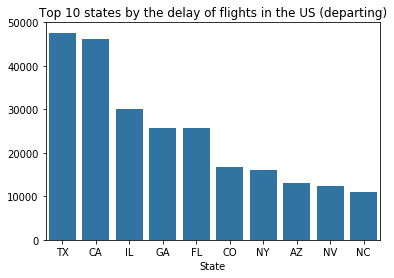

In [282]:
delay_air = df_delay[['Origin']].copy() #I created a copy of the dataframe that has all delayed flights.
delay_air = delay_air.rename(columns={'Origin':'iata'})
delay_air_full = delay_air.merge(airports,on='iata')
sb.countplot(data=delay_air_full,x='state',order=delay_air_full.state.value_counts().iloc[:10].index,color=base_color)
plt.title('Top 10 states by the delay of flights in the US (departing)')
plt.ylabel('')
plt.xlabel('State')
plt.show()

<b>The distribution above shows that Texas, California and Illions have the highest number of departing flight delays.</b>

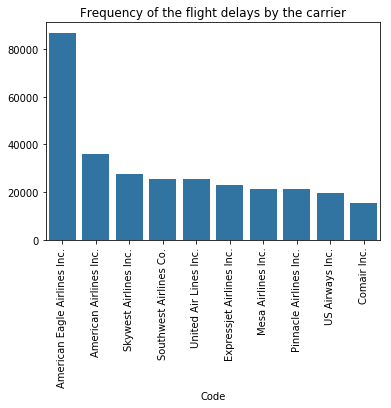

In [298]:
delay_carr = df_delay[['UniqueCarrier']]
delay_carr = delay_carr.rename(columns={'UniqueCarrier':'Code'})
delay_carr_full = delay_carr.merge(carriers,on='Code')
sb.countplot(data=delay_carr_full,x='Code',order=delay_carr_full.Code.value_counts().iloc[:10].index,color=base_color)
plt.title('Frequency of the flight delays by the carrier')
plt.ylabel('')
labels = canc_carr_full.Description.value_counts().iloc[:10].index.values.tolist()
for i in range(0,len(labels)):
    if len(labels[i]) > 40:
        labels[i] = 'US Airways Inc.'
ticks = np.arange(0,10,1)
plt.xticks(ticks,labels,rotation=90)
plt.show()

<b>The highest number of delays happened on flights organised by American Eagle Airlines.</b>

### Major findings from Univariate Exploration

1. The majority of flights (98%) were not cancelled, but if they were, they were mostly caused by the weather or the carrier. 
2. There was not a great difference in the number of flights between the weekdays, however Saturdays had the lowest number of flights.
3. There was not a great difference in the number of flights cancelled between the weekdays, however Saturdays had the lowest number of cancellations.
4. The majority of flights depart from 6 am to 6 pm and arrive between 8 am and 10 pm.
5. The highest number of the flight cancellations happened in winter(40%).
6. The arrival delays are usually longer than the departure delays.
7. Illinois, Texas and California have the highest absolute number of departing flights cancelled. 
8. American Eagle Airlines, American Airlines and Southwest Airlines have the highest absolute number of flight cancellations.

## Bivariate Exploration

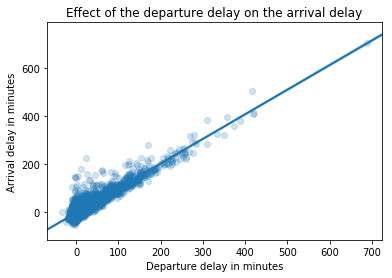

In [184]:
sb.regplot(data=df.sample(10000),x='DepDelay',y='ArrDelay',fit_reg=True,scatter_kws={'alpha':1/5})
plt.title('Effect of the departure delay on the arrival delay')
plt.xlabel('Departure delay in minutes')
plt.ylabel('Arrival delay in minutes')
plt.show()

<b>The plot above shows a clear relationship between the departure delay and the arrival delay. The overall trend suggests that if the plane left the airport after the scheduled time it is more likely to arrive late at the destination, so it is hard for the plane to catch up.</b>

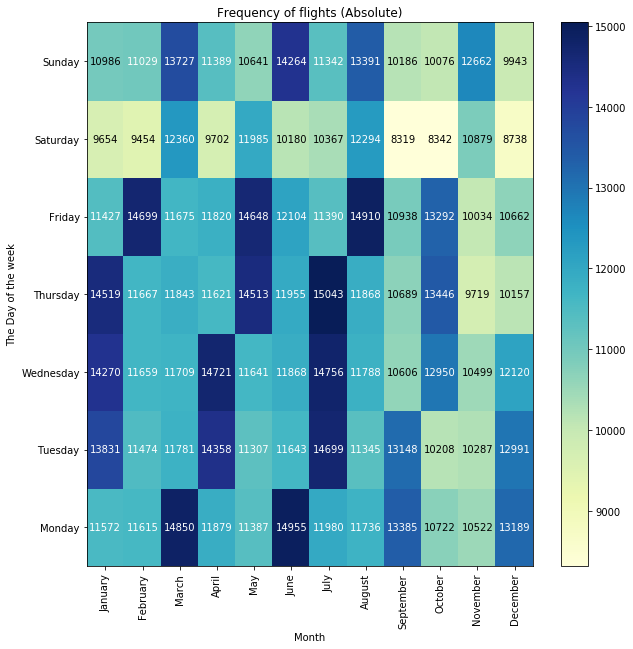

In [185]:
plt.figure(figsize=[10,10])

bins_y = np.arange(1,9,1)
bins_x = np.arange(1,14,1)
h2d = plt.hist2d(data=df,x='Month',y='DayOfWeek',bins=[bins_x,bins_y],cmap='YlGnBu')
plt.xlabel('Month')
plt.ylabel('The Day of the week')
plt.title('Frequency of flights (Absolute)')
ticks = np.arange(1.5,13.5,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks, months, rotation=90) 
ticks = np.arange(1.5,8.5,1)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(ticks, days, rotation=0) 
plt.colorbar()
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=11000:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='white')
        elif c > 7000:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='black')

<b>The plot above shows a distribution of flights throughout the year and weekdays. Saturdays during winter and autumn have the least number of flights on average and the flights on the working days are particularly busy during summer.</b>

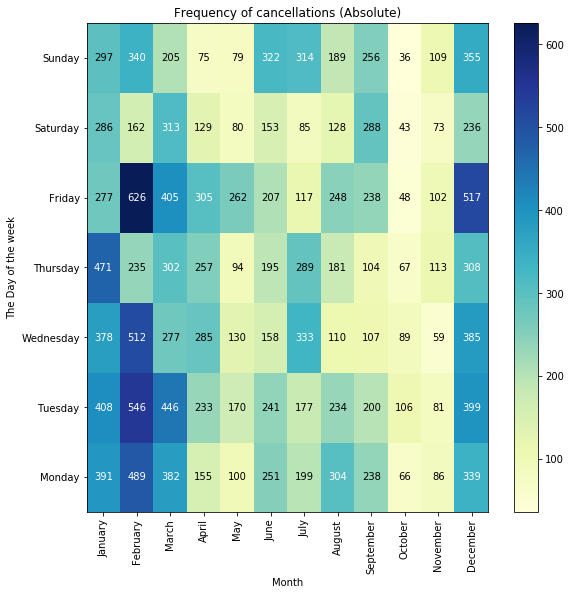

In [186]:
plt.figure(figsize=[9,9])

bins_y = np.arange(1,9,1)
bins_x = np.arange(1,14,1)
h2d = plt.hist2d(data=df_canc,x='Month',y='DayOfWeek',bins=[bins_x,bins_y],cmap='YlGnBu')
plt.xlabel('Month')
plt.ylabel('The Day of the week')
plt.title('Frequency of cancellations (Absolute)')
ticks = np.arange(1.5,13.5,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks, months, rotation=90) 
ticks = np.arange(1.5,8.5,1)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(ticks, days, rotation=0) 
plt.colorbar()
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=300:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='white')
        elif c>0:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='black')

<b>The plot above shows that winter flights, especially during the working days are more likely to be cancelled than any other flights.</b>

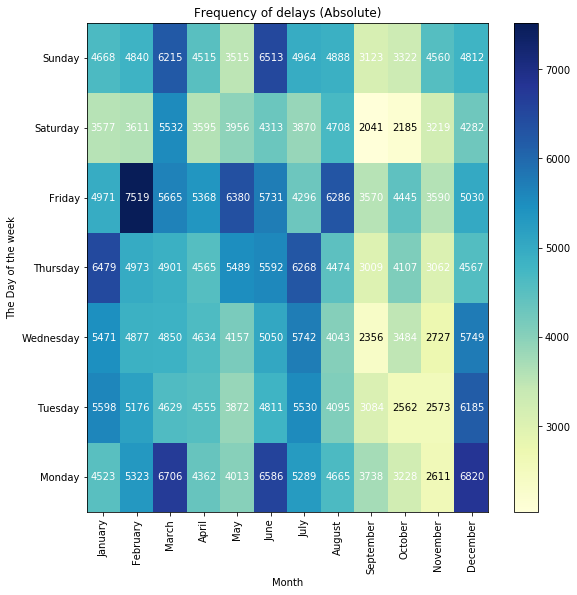

In [189]:
plt.figure(figsize=[9,9])

bins_y = np.arange(1,9,1)
bins_x = np.arange(1,14,1)
h2d = plt.hist2d(data=df_delay,x='Month',y='DayOfWeek',bins=[bins_x,bins_y],cmap='YlGnBu')
plt.xlabel('Month')
plt.ylabel('The Day of the week')
plt.title('Frequency of delays (Absolute)')
ticks = np.arange(1.5,13.5,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks, months, rotation=90) 
ticks = np.arange(1.5,8.5,1)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(ticks, days, rotation=0) 
plt.colorbar()
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=3000:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='white')
        elif c>0:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='black')

<b>The plot above suggests that there is some correlation between the worst days and months for the flight cancellations and the delays. Winter months and weekdays continue to be "the worst" time to travel by plane.</b>

In [192]:
df_canc_1['Season'] = df_canc_1['Season'].replace(['Winter','Spring','Summer','Autumn'],[1,2,3,4])

In [193]:
df_canc_1['CancellationCode'] = df_canc_1['CancellationCode'].replace(['A','B','C','D'],[1,2,3,4])

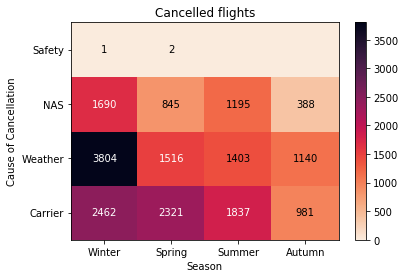

In [194]:
bins_edges = np.arange(1,6,1)
ticks = np.arange(1.5,5.5,1)
h2d = plt.hist2d(data=df_canc_1,x='Season',y='CancellationCode',bins=[bins_edges,bins_edges], cmap = 'rocket_r')
plt.xticks(ticks,['Winter','Spring','Summer','Autumn'])
plt.yticks(ticks,['Carrier','Weather','NAS','Safety'])
plt.colorbar()
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=1500:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='white')
        elif c>0:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha='center',va='center',color='black')
plt.xlabel('Season')
plt.ylabel('Cause of Cancellation')
plt.title('Cancelled flights')
plt.show()

<b>The plot above shows an interesting pattern that the weather is the primary cause of the flight cancellations in winter, however during other seasons the carriers cause more cancellations than other reasons.</b>

## Multivariate Exploration

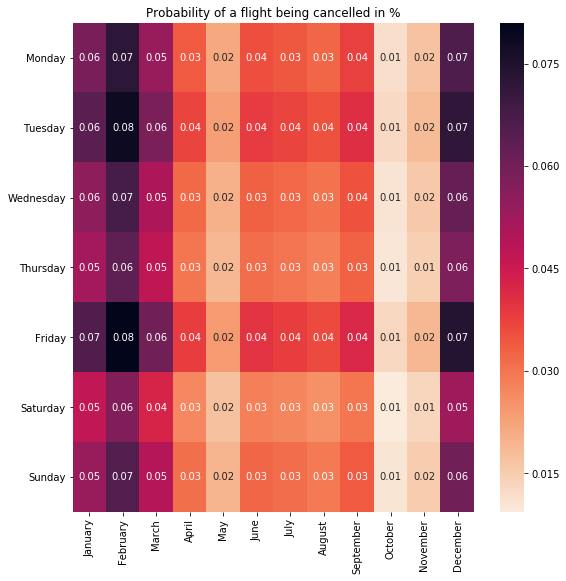

In [187]:
plt.figure(figsize=[9,9])

month_canc_prop = df_canc['Month'].value_counts()/df['Month'].value_counts()
weekday_canc_prop = df_canc['DayOfWeek'].value_counts()/df['DayOfWeek'].value_counts()

col = pd.Series(month_canc_prop.values.tolist(), index=month_canc_prop.index.tolist())
row = pd.Series(weekday_canc_prop.values.tolist(), weekday_canc_prop.index.tolist())
canc_prob = row.apply(lambda r: r * col * 100)
canc_prob.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
canc_prob.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

sb.heatmap(canc_prob, cmap = 'rocket_r', annot=True, fmt = '.2f')
plt.title('Probability of a flight being cancelled in %')
plt.yticks(rotation=0)
plt.show()

<b>The plot above shows the matrix of probabilities of missing a flight. I calculated it by multiplying the probability of a flight being cancelled on a particular day by the probability of a flight being cancelled in a particular month.</b>

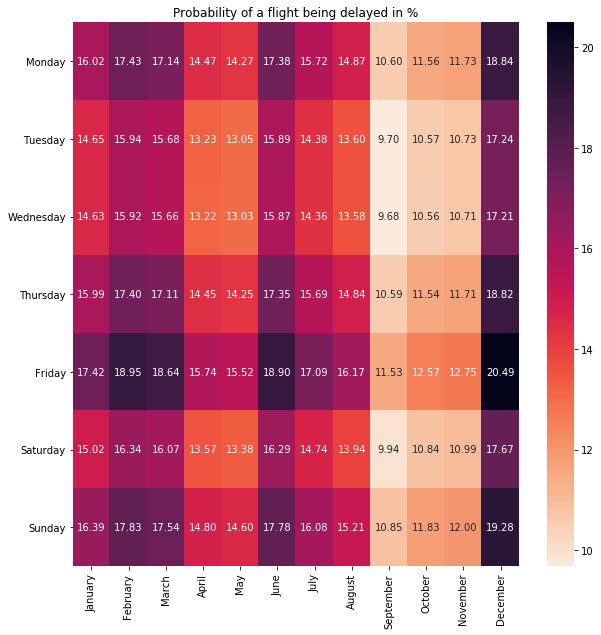

In [190]:
month_delay_prob = df_delay['Month'].value_counts()/df['Month'].value_counts()
weekday_delay_prob = df_delay['DayOfWeek'].value_counts()/df['DayOfWeek'].value_counts()

plt.figure(figsize=[10,10])

col = pd.Series(month_delay_prob.values.tolist(), index=month_delay_prob.index.tolist())
row = pd.Series(weekday_delay_prob.values.tolist(), weekday_delay_prob.index.tolist())
delay_prob = row.apply(lambda r: r * col * 100)
delay_prob.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
delay_prob.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

sb.heatmap(delay_prob, cmap = 'rocket_r', annot=True, fmt = '.2f')
plt.title('Probability of a flight being delayed in %')
plt.yticks(rotation=0)
plt.show()

<b>The plot above suggests that the probability of a flight being delayed is the highest in December.</b>

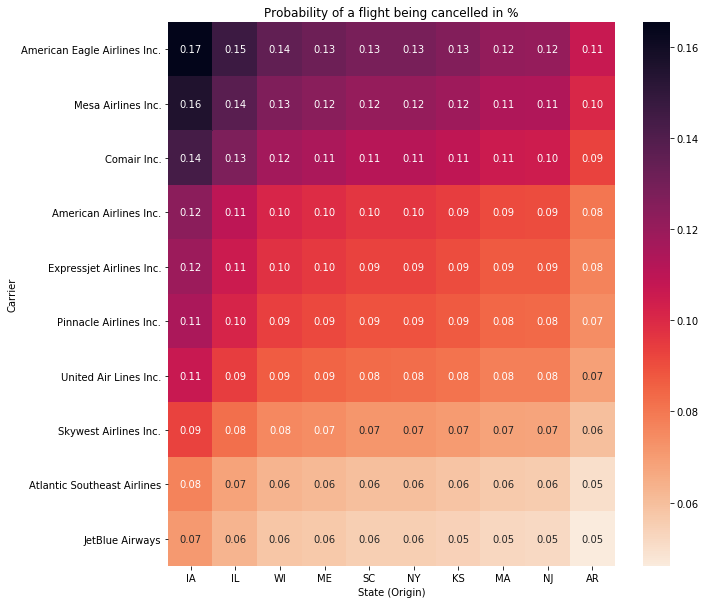

In [191]:
air = df[['Origin']]
air = air.rename(columns={'Origin':'iata'})
air_full = air.merge(airports,on='iata')
air_canc_prob = (canc_air_full['state'].value_counts()/air_full['state'].value_counts()).sort_values(ascending=False)[:10]

carr = df[['UniqueCarrier']]
carr = carr.rename(columns={'UniqueCarrier':'Code'})
carr_full = carr.merge(carriers,on='Code')
carr_canc_prob = (canc_carr_full['Description'].value_counts()/carr_full['Description'].value_counts()).sort_values(ascending=False)[:10]

plt.figure(figsize=[10,10])

col = pd.Series(air_canc_prob.values.tolist(), index=air_canc_prob.index.tolist())
row = pd.Series(carr_canc_prob.values.tolist(), index=carr_canc_prob.index.tolist())
canc_prob = row.apply(lambda r: r * col * 100)

sb.heatmap(canc_prob, cmap = 'rocket_r', annot=True, fmt = '.2f')
plt.title('Probability of a flight being cancelled in %')
plt.yticks(rotation=0)
plt.xlabel('State (Origin)')
plt.ylabel('Carrier')
plt.show()

<b>The plot above suggests that the flights organised by Mesa Airlines and American Eagle Airlines flying to Iowa have the highest chances of being cancelled.</b>

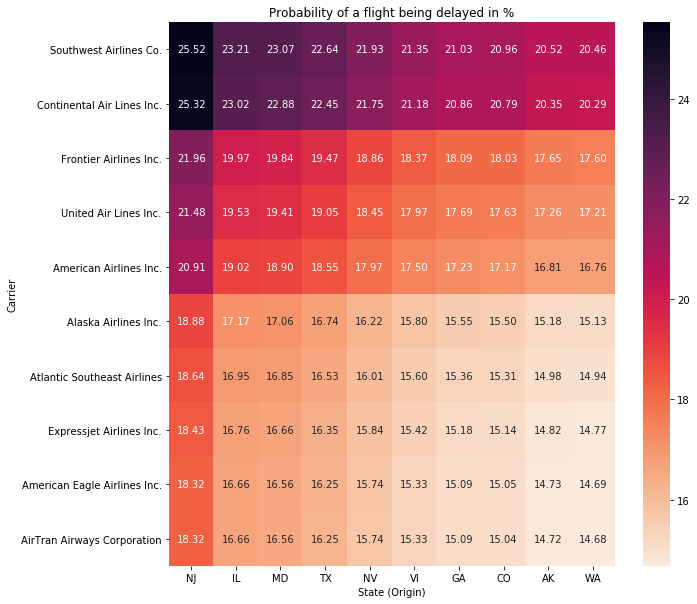

In [318]:
air_delay_prob = (delay_air_full['state'].value_counts()/air_full['state'].value_counts()).sort_values(ascending=False)[:10]
carr_delay_prob = (delay_carr_full['Description'].value_counts()/carr_full['Description'].value_counts()).sort_values(ascending=False)[:10]

plt.figure(figsize=[10,10])

col = pd.Series(air_delay_prob.values.tolist(), index=air_delay_prob.index.tolist())
row = pd.Series(carr_delay_prob.values.tolist(), index=carr_delay_prob.index.tolist())
delay_prob = row.apply(lambda r: r * col * 100)

sb.heatmap(delay_prob, cmap = 'rocket_r', annot=True, fmt = '.2f')
plt.title('Probability of a flight being delayed in %')
plt.yticks(rotation=0)
plt.xlabel('State (Origin)')
plt.ylabel('Carrier')
plt.show()

<b>The plot above shows that the highest chances of taking taking a flight and it being delayed is when you are flying from New Jersey with Southwest airlines.</b>